# Working with Classification Trees in Python

## Learning Objectives
Decision Trees are one of the most popular approaches to supervised machine learning. Decison Trees use an inverted tree-like structure to model the relationship between independent variables and a dependent variable. A tree with a categorical dependent variable is known as a **Classification Tree**. By the end of this tutorial, you will have learned:

+ How to import, explore and prepare data
+ How to build a Classification Tree model
+ How to visualize the structure of a Classification Tree
+ How to Prune a Classification Tree 

## 1. Collect the Data

In [1]:
import pandas as pd
loan = pd.read_csv("loan.csv")
loan.head()

,Income,Loan Amount,Default
0,15,8,No
1,30,8,No
2,5,9,Yes
3,22,10,No
4,33,12,No


## 2. Explore the Data

In [4]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Income       30 non-null     int64 
 1   Loan Amount  30 non-null     int64 
 2   Default      30 non-null     object
dtypes: int64(2), object(1)
memory usage: 852.0+ bytes


In [5]:
loan.describe()

,Income,Loan Amount
count,30.000000,30.000000
mean,18.766667,51.966667
std,8.572946,34.055212
min,5.000000,8.000000
25%,13.000000,21.250000
50%,18.000000,49.000000
75%,25.500000,79.500000
max,34.000000,110.000000


In [2]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

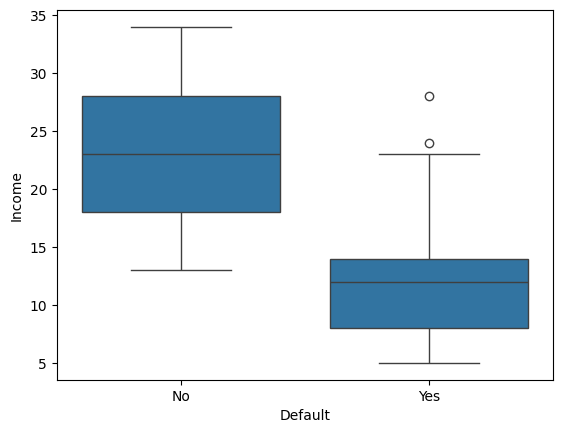

In [3]:
ax = sns.boxplot(data = loan, x = 'Default', y = 'Income')

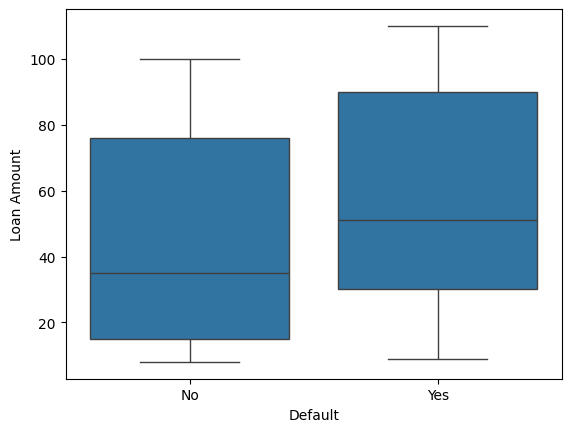

In [4]:
ax = sns.boxplot(data = loan, x = 'Default', y = 'Loan Amount')

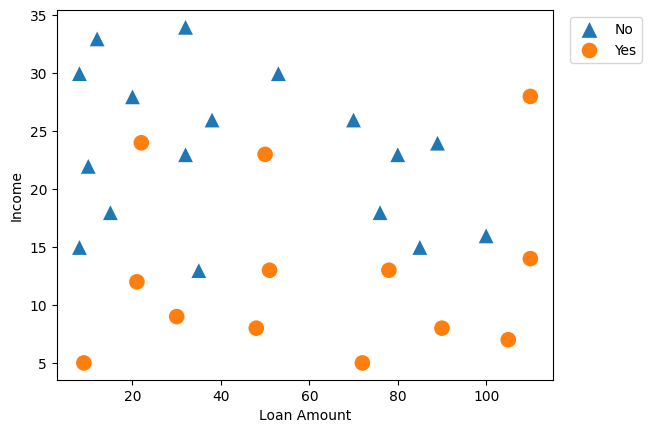

In [7]:
ax = sns.scatterplot(data = loan, 
                     x = 'Loan Amount', 
                     y = 'Income', 
                     hue = 'Default', 
                     style = 'Default', 
                     markers = ['^','o'], 
                     s = 150)
ax = plt.legend(bbox_to_anchor = (1.02, 1), loc = 'upper left')

## 3. Prepare the Data

In [19]:
y = loan[["Default"]]
y

,Default
0,No
1,No
2,Yes
3,No
4,No
5,No
6,No
7,Yes
8,Yes
9,Yes


In [11]:
X = loan[["Income","Loan Amount"]]

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size = 0.8,
                                                    stratify = y,
                                                    random_state = 1234) 

In [13]:
X_train.shape, X_test.shape

((24, 2), (6, 2))

## 4. Train and Evaluate the Classification Tree

In [14]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(random_state = 1234)

In [15]:
model = classifier.fit(X_train,y_train)

In [16]:
model.score(X_test,y_test)

0.5

## 5. Visualize the Classification Tree

[Text(0.4444444444444444, 0.9, 'Income <= 14.5\ngini = 0.486\nsamples = 24\nvalue = [14, 10]\nclass = Yes'),
 Text(0.2222222222222222, 0.7, 'Income <= 12.5\ngini = 0.198\nsamples = 9\nvalue = [1, 8]\nclass = NO'),
 Text(0.3333333333333333, 0.8, 'True  '),
 Text(0.1111111111111111, 0.5, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]\nclass = NO'),
 Text(0.3333333333333333, 0.5, 'Loan Amount <= 56.5\ngini = 0.444\nsamples = 3\nvalue = [1, 2]\nclass = NO'),
 Text(0.2222222222222222, 0.3, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = Yes'),
 Text(0.4444444444444444, 0.3, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]\nclass = NO'),
 Text(0.6666666666666666, 0.7, 'Income <= 22.5\ngini = 0.231\nsamples = 15\nvalue = [13, 2]\nclass = Yes'),
 Text(0.5555555555555556, 0.8, '  False'),
 Text(0.5555555555555556, 0.5, 'gini = 0.0\nsamples = 6\nvalue = [6, 0]\nclass = Yes'),
 Text(0.7777777777777778, 0.5, 'Income <= 25.0\ngini = 0.346\nsamples = 9\nvalue = [7, 2]\nclass = Yes'),
 Text(0.6666666666666666, 0

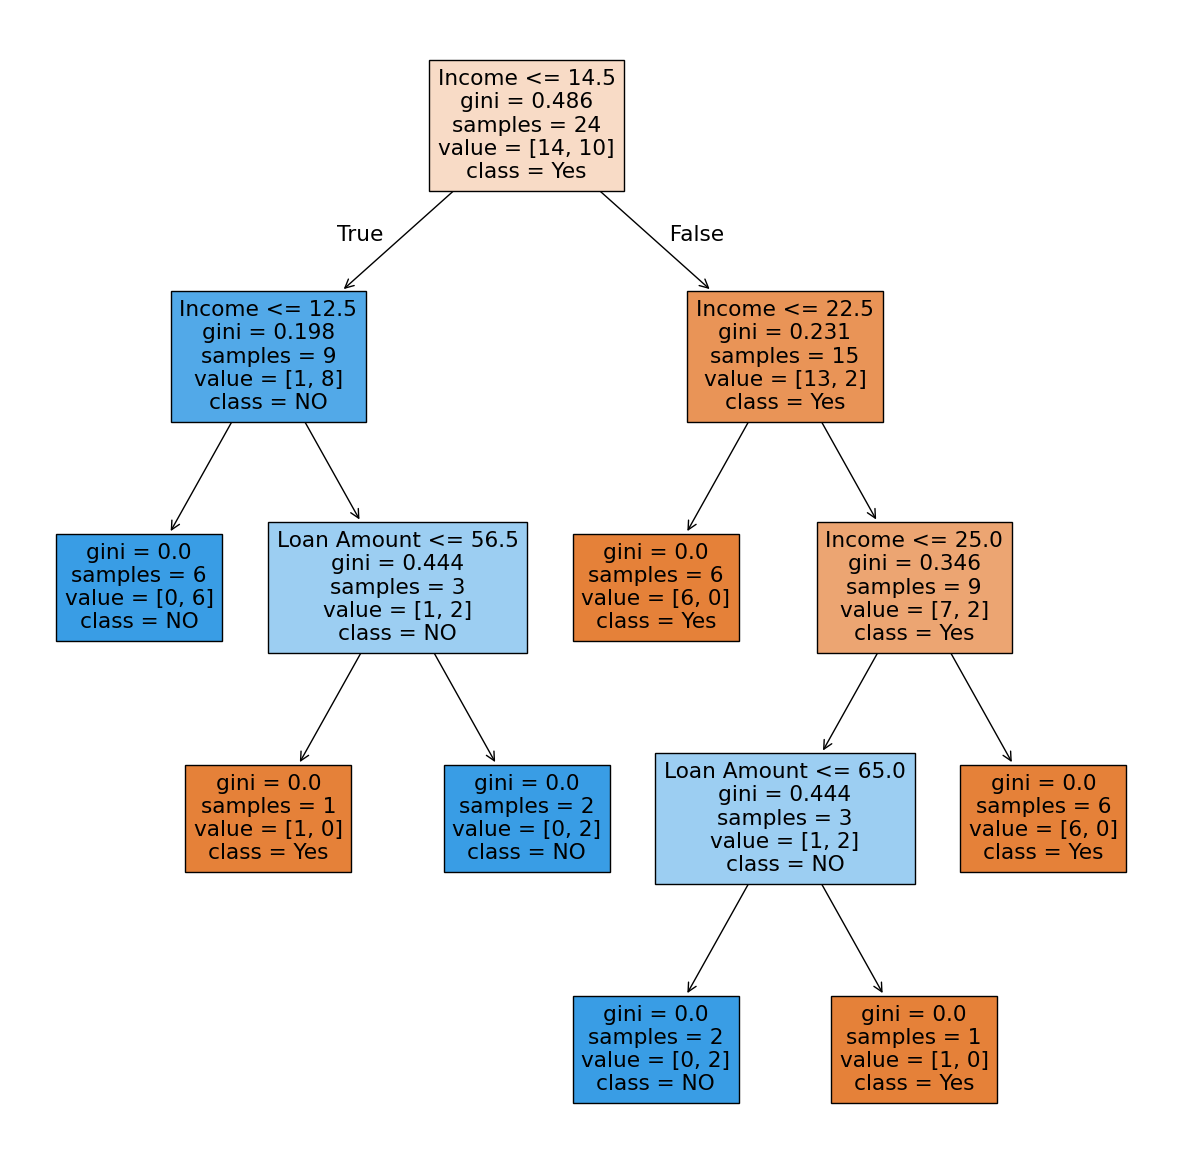

In [18]:
from sklearn import tree
plt.figure(figsize = (15,15))
tree.plot_tree(model, feature_names= list(X.columns), class_names= ["Yes","NO"], filled=True)

Text(0, 0.5, 'Importance')

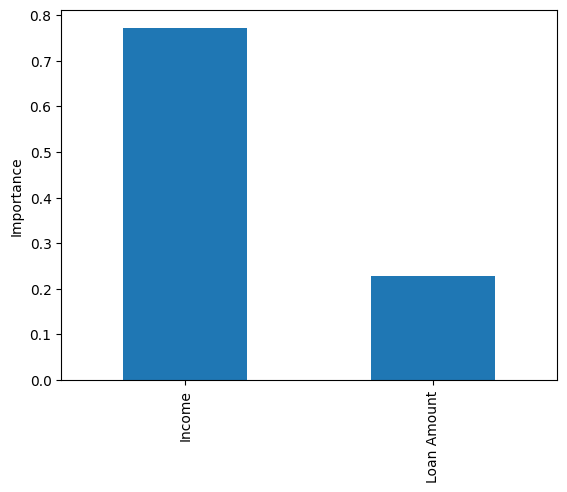

In [23]:
importance = model.feature_importances_
feature_importance = pd.Series(importance,index = X.columns)
feature_importance.plot(kind = 'bar')
plt.ylabel('Importance')

## 6. Prune the Classification Tree

In [24]:
model.score(X_train, y_train)

1.0

In [26]:
model.score(X_test, y_test)
# model correctness on test data and train data varies significantly. ---> overfitting, so needs to be pruned

0.5

In [35]:
grid = {"max_depth": [2,3,4,5],
        "min_samples_split":[2,3,4],
        "min_samples_leaf":[1,2,3,4,5,6,7,8,9]}

In [36]:
from sklearn.model_selection import GridSearchCV
classifier = DecisionTreeClassifier(random_state = 1234)
gcv = GridSearchCV(estimator=classifier,param_grid=grid)
# we passed grid dictionary to find the best parameters in the lists. It evaluates each hyper parameter combination in grid
gcv.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=1234),
             param_grid={'max_depth': [2, 3, 4, 5],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'min_samples_split': [2, 3, 4]})

In [37]:
model_ = gcv.best_estimator_
model_.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2, min_samples_leaf=7, random_state=1234)

In [38]:
model_.score(X_train, y_train)

0.875

In [40]:
model_.score(X_test, y_test)

0.8333333333333334

[Text(0.4, 0.8333333333333334, 'Income <= 14.5\ngini = 0.486\nsamples = 24\nvalue = [14, 10]\nclass = No'),
 Text(0.2, 0.5, 'gini = 0.198\nsamples = 9\nvalue = [1, 8]\nclass = Yes'),
 Text(0.30000000000000004, 0.6666666666666667, 'True  '),
 Text(0.6, 0.5, 'Loan Amount <= 35.0\ngini = 0.231\nsamples = 15\nvalue = [13, 2]\nclass = No'),
 Text(0.5, 0.6666666666666667, '  False'),
 Text(0.4, 0.16666666666666666, 'gini = 0.245\nsamples = 7\nvalue = [6, 1]\nclass = No'),
 Text(0.8, 0.16666666666666666, 'gini = 0.219\nsamples = 8\nvalue = [7, 1]\nclass = No')]

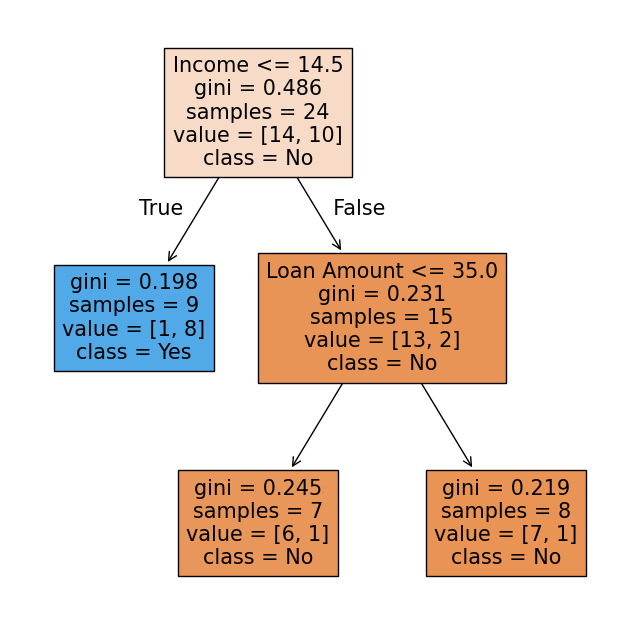

In [41]:
plt.figure(figsize = (8,8))
tree.plot_tree(model_, 
                   feature_names = list(X.columns), 
                   class_names = ['No','Yes'],
                   filled = True)